<a href="https://colab.research.google.com/github/Shuraimi/fastai_DL_course/blob/main/Lesson5_reproduce_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, i'll be reproducing the lesson 5 notebook results

In [ ]:
# import libraries
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1
import fastbook
fastbook.setup_book()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
Mounted at /content/gd

In [ ]:
#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [ ]:
# path of dataset
path=Path('/content/gdrive/MyDrive/bluebook-for-bulldozers')

In [ ]:
Path.BASE_PATH=path

In [ ]:
# list of folders in path
path.ls()

(#22) [Path('Train.7z'),Path('TrainAndValid.7z'),Path('Valid.7z'),Path('Machine_Appendix.csv'),Path('median_benchmark.csv'),Path('random_forest_benchmark_test.csv'),Path('Test.csv'),Path('test_predictions.csv'),Path('Train.csv'),Path('train_tmp.csv')...]

## Loading the data

In [ ]:
df=pd.read_csv(path/'TrainAndValid.csv',low_memory=False)
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,...,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,...,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,...,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,...,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,...,NaN,NaN,NaN,NaN


In [ ]:
# list of columns
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
df.shape

(412698, 53)

In [ ]:
df.describe(include='object')

,UsageBand,saledate,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,73670,412698,412698,412698,...,81875,81877,71564,71522
unique,3,4013,5059,1961,...,10,7,4,5
top,Medium,2/16/2009 0:00,310G,580,...,PAT,None or Unspecified,Standard,Conventional
freq,35832,1932,5348,20179,...,39633,71447,70169,70774


In [ ]:
df.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
...,...
Backhoe_Mounting,331986
Blade_Type,330823
Travel_Controls,330821
Differential_Type,341134


### Handling categorical column product size

In [ ]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [ ]:
sizes=['Large','Large / Medium','Medium','Small','Compact','Mini']

In [ ]:
df['ProductSize']=df['ProductSize'].astype('category')

In [ ]:
df['ProductSize']=df['ProductSize'].cat.set_categories(sizes,ordered=True)

In [ ]:
df['ProductSize'].unique()

[NaN, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact']
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Compact' < 'Mini']

In [ ]:
df['ProductSize'].cat.codes

,0
0,-1
1,2
2,-1
3,3
4,-1
...,...
412693,5
412694,5
412695,5
412696,5


In [ ]:
df['ProductSize']

,ProductSize
0,NaN
1,Medium
2,NaN
3,Small
4,NaN
...,...
412693,Mini
412694,Mini
412695,Mini
412696,Mini


### Handle date column

In [ ]:
df=add_datepart(df,'saledate')

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


In [ ]:
# getting all columns which begin with sale
' '.join(col for col in df.columns if col.startswith('sale'))

'saleYear saleMonth saleWeek saleDay saleDayofweek saleDayofyear saleIs_month_end saleIs_month_start saleIs_quarter_end saleIs_quarter_start saleIs_year_end saleIs_year_start saleElapsed'

### Handling dependent variable

In [ ]:
dep_var=['SalePrice']

In [ ]:
df[dep_var]=np.log(df[dep_var])

## Tabular Pandas

Next steps of preprocessing using tabular pandas

In [ ]:
procs=[Categorify,FillMissing]

In [ ]:
# define splits
cond=(df.saleYear<2011)|(df.saleMonth<10)
train_idx=np.where(cond)[0]
valid_idx=np.where(~cond)[0]

In [ ]:
# i had forgotten this
train_idx[0]

0

In [ ]:
# train_idx[1]

In [ ]:
splits=(list(train_idx),list(valid_idx))


In [ ]:
# fastai needs to know which columns are categorical and continuous
cont,cat=cont_cat_split(df,1,dep_var=dep_var)

In [ ]:
to=TabularPandas(df,procs,cat,cont,splits=splits,y_names=dep_var)

In [ ]:
to.show(3)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340


In [ ]:
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,...,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,...,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,...,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,...,1,1.077754e+09,1,1


## Decision tree

In [ ]:
# get xs and y from to object
xs=to.train.xs
y=to.train.y

valid_xs,valid_y=to.valid.xs,to.valid.y

In [ ]:
# traing decion tree
m=DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

DecisionTreeRegressor(max_leaf_nodes=4)

In [ ]:
# defining metrics
def r_mse(preds,y): return np.round((np.sqrt((preds-y)**2).mean()),6)
def m_rmse(m,xs,y): return r_mse(m.predict(xs),y)

In [ ]:
m_rmse(m,xs,y),m_rmse(m,valid_xs,valid_y)

(0.450849, 0.454808)

### Visulise the tree

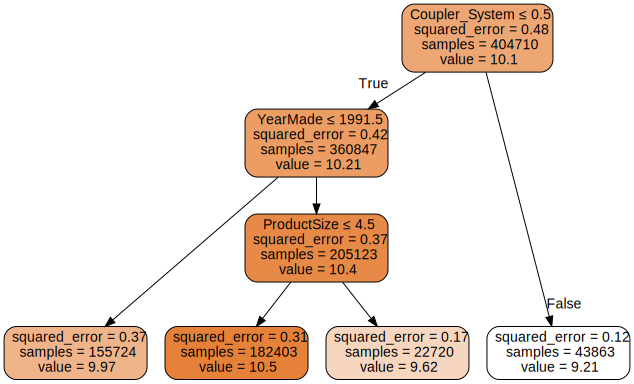

In [ ]:
draw_tree(m,xs,size=10,precision=2,leaves_parallel=True)

USing dtreeviz

- take some sample indicies

In [ ]:
samp_idx=np.random.permutation(len(y))[:500]
# dtreeviz()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


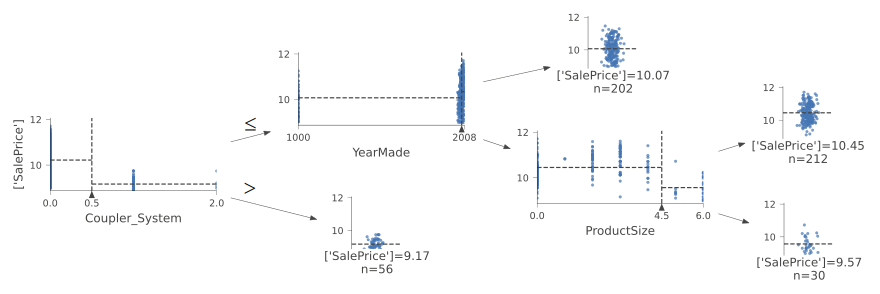

In [ ]:
dtreeviz(m,xs.iloc[samp_idx],y.iloc[samp_idx],xs.columns,dep_var,
         fontname='DejaVu Sans',scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
# handling the yearmade column by setting 1000 to 1950
xs.loc[xs.YearMade<1900,'YearMade']=1950

In [ ]:
valid_xs.loc[valid_xs.YearMade<1900,'YearMade']=1950

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


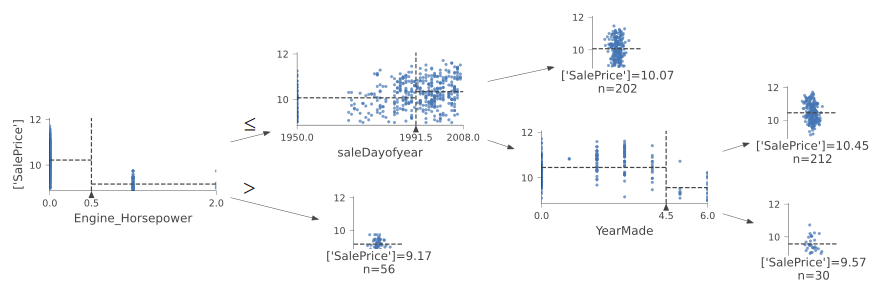

In [ ]:
dtreeviz(m,xs.iloc[samp_idx],y.iloc[samp_idx],df.columns,dep_var,
         fontname='DejaVu Sans',scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
# dt without any parameter setting
m=DecisionTreeRegressor()
m.fit(xs,y)

DecisionTreeRegressor()

In [ ]:
m.get_n_leaves()

324562

In [ ]:
len(xs)

404710

In [ ]:
m_rmse(m,xs,y),m_rmse(m,valid_xs,valid_y)

(0.0, 0.247331)

In [ ]:
m=DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs,to.train.y)

DecisionTreeRegressor(min_samples_leaf=25)

In [ ]:
m_rmse(m,xs,y),m_rmse(m,valid_xs,valid_y)

(0.164982, 0.220487)

In [ ]:
m.get_n_leaves()

12397

## RAndom Forest

In [ ]:
# defining a function to initailise rf
def rf(xs,y,n_estimators=40,max_features=0.5,max_samples=200_00,min_samples_leaf=5,**kwargs):
    return RandomForestRegressor(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=5,max_samples=max_samples,n_jobs=-1,oob_score=True).fit(xs,y)

In [ ]:
m=rf(xs,y)

In [ ]:
m_rmse(m,xs,y),m_rmse(m,valid_xs,valid_y)

(0.177512, 0.20182)

Forgot this part

get preds of each tree and plot it

In [ ]:
preds=np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

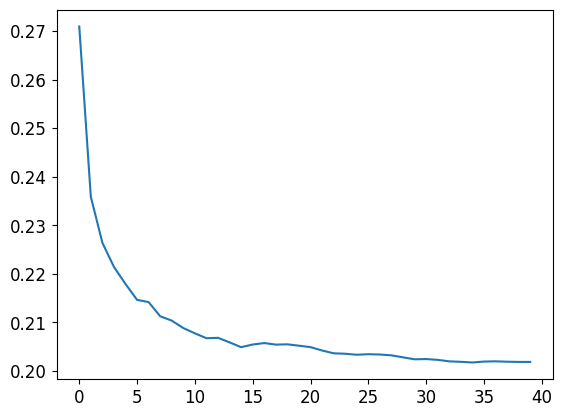

In [ ]:
plt.plot([r_mse(preds[:i+1].mean(0),valid_y) for i in range(0,40)])

### Out-of-Bag error

Forgot the part below
⬇

In [ ]:
r_mse(m.oob_prediction_,y)

0.18218

## Model interpretation

### Tree variance

In [ ]:
preds=np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [ ]:
preds.std(0)

array([0.42604613, 0.18675805, 0.12509618, ..., 0.17075144, 0.15363115, 0.15363115])

### Feature importances

In [ ]:
def feat_import(m,df):
    return pd.DataFrame(
        {
            'cols':df.columns,
            'imp':m.feature_importances_
        }
    ).sort_values('imp',ascending=False)

In [ ]:
fi=feat_import(m,xs)[:30]

In [ ]:
fi

,cols,imp
57,YearMade,0.182242
30,Coupler_System,0.134814
6,ProductSize,0.115948
7,fiProductClassDesc,0.074801
54,ModelID,0.054558
...,...,...
18,Turbocharged,0.004177
61,saleWeek,0.003630
16,Stick,0.003383
56,auctioneerID,0.003155


In [ ]:
def fi_plot(fi):
    return fi.plot('cols','imp','barh',legend=False)

<Axes: ylabel='cols'>

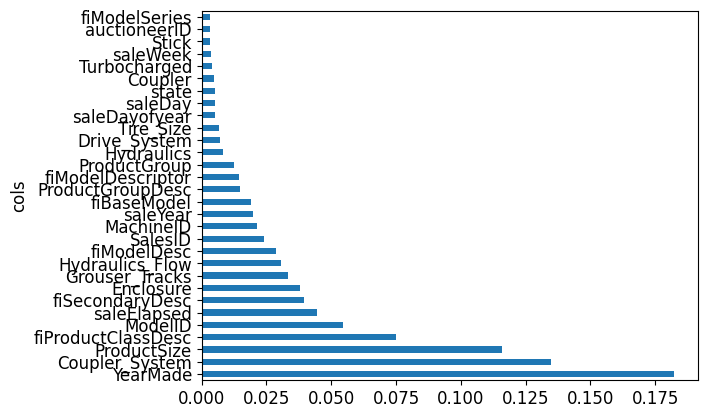

In [ ]:
fi_plot(fi)

### Removing features with low feature imporatnce

In [ ]:
to_keep=fi[fi['imp']>0.005].cols
to_keep

,cols
57,YearMade
30,Coupler_System
6,ProductSize
7,fiProductClassDesc
54,ModelID
...,...
23,Hydraulics
11,Drive_System
28,Tire_Size
64,saleDayofyear


In [ ]:
xs_keep=xs[to_keep]
valid_xs_keep=valid_xs[to_keep]

In [ ]:
m=rf(xs_keep,y)

In [ ]:
m_rmse(m,xs_keep,y),m_rmse(m,valid_xs_keep,valid_y)

(0.177218, 0.199744)

In [ ]:
fi=feat_import(m,xs_keep)


<Axes: ylabel='cols'>

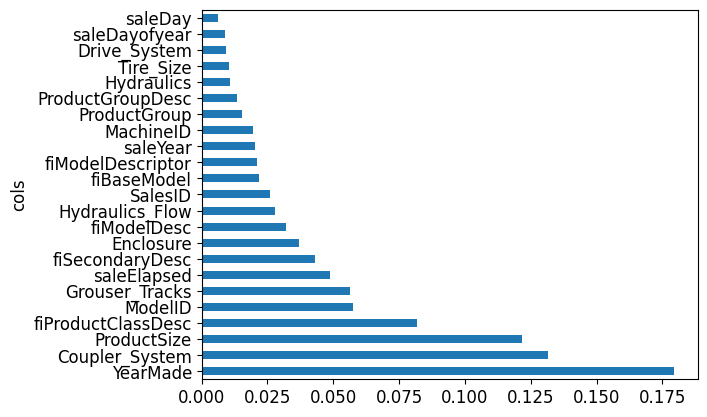

In [ ]:
fi_plot(fi)

### Removing redundant features

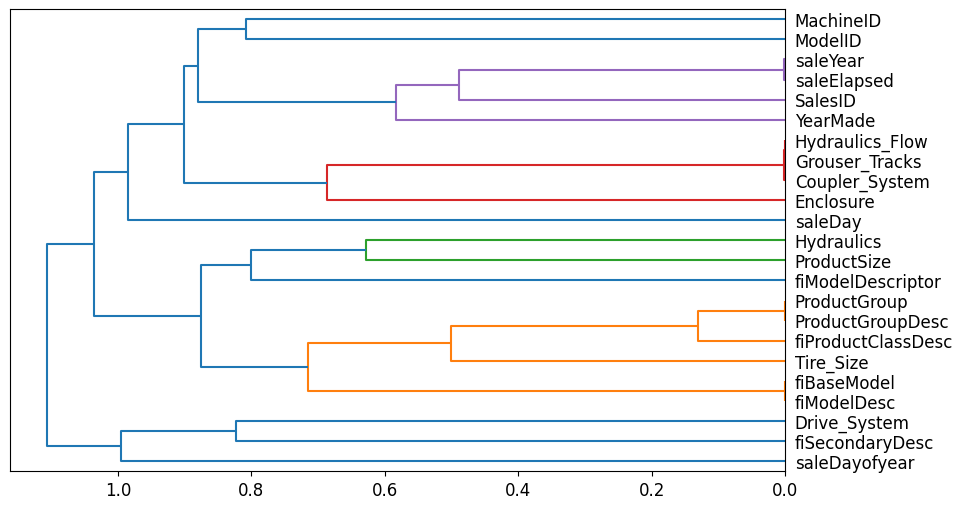

In [ ]:
cluster_columns(xs_keep)

In [ ]:
def get_oob_score(xs,y):
    m=rf(xs,y)
    return m.oob_score_

In [ ]:
get_oob_score(xs_keep,y)

0.8754869108941141

In [ ]:
# dropping one column at a time and checking the score
cols=['saleYear','saleElapsed','Hydraulics_Flow','Grouser_Tracks','Coupler_System','ProductGroup','ProductGroupDesc','fiBaseModel','fiModelDesc']
for col in cols:
    score=get_oob_score(xs_keep.drop(col,axis=1),y)
    print(col,":",score)

saleYear : 0.8750765598650124
saleElapsed : 0.8716048934588645
Hydraulics_Flow : 0.8761862943903882
Grouser_Tracks : 0.876170316192359
Coupler_System : 0.876101152314401
ProductGroup : 0.8760449519042485
ProductGroupDesc : 0.8759241280064128
fiBaseModel : 0.8748432968827365
fiModelDesc : 0.8746251163975275


Another way of doing the above is

In [ ]:
{c:get_oob_score(xs_keep.drop(c,axis=1)) for c in
 (
    'saleYear', 'saleElapsed', 'ProductGroupDesc','ProductGroup',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

Removing one from each group and calculating score

In [ ]:
to_drop=['saleElapsed','ProductGroupDesc','fiModelDesc','Grouser_Tracks']
get_oob_score(xs_keep.drop(to_drop,axis=1),y)

0.8701184684830672

In [ ]:
xs_final=xs_keep.drop(to_drop,axis=1)
valid_xs_final=valid_xs_keep.drop(to_drop,axis=1)

In [ ]:
m=rf(xs_final,y)

In [ ]:
m_rmse(m,xs_final,y),m_rmse(m,valid_xs_final,valid_y)

(0.182836, 0.201548)

### Partial dependence plot

In [ ]:
xs_final['ProductSize'].value_counts()

,count
ProductSize,
0,212675
3,63011
2,50074
4,26573
6,25094
1,21116
5,6167


([<matplotlib.axis.YTick at 0x7e2ff9bb7460>,
 [Text(0, 0, '#na#'),
  Text(0, 1, 'Large'),
  Text(0, 2, 'Large / Medium'),
  Text(0, 3, 'Medium'),
  Text(0, 4, 'Small'),
  Text(0, 5, 'Compact'),
  Text(0, 6, 'Mini')])

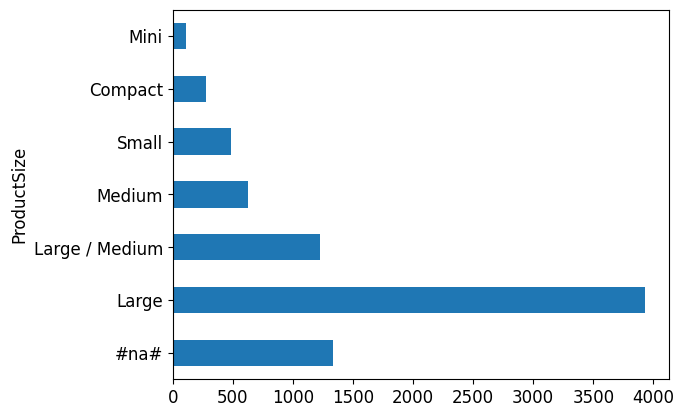

In [ ]:
p=valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c=to.classes['ProductSize']
plt.yticks(range(len(c)),c)

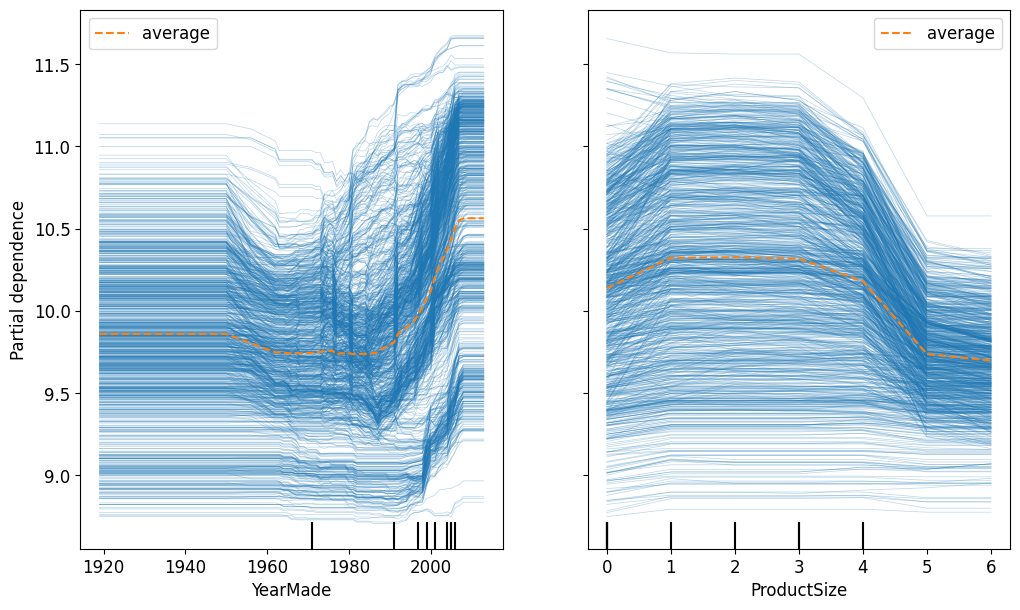

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig,ax=plt.subplots(figsize=(12,7))
PartialDependenceDisplay.from_estimator(m,valid_xs_final,['YearMade','ProductSize'],kind='both',ax=ax)

### Tree interpreter

In [ ]:
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [ ]:
rows=valid_xs_final.iloc[:5]

In [ ]:
preds,bias,contri=treeinterpreter.predict(m,rows.values
                                          )

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

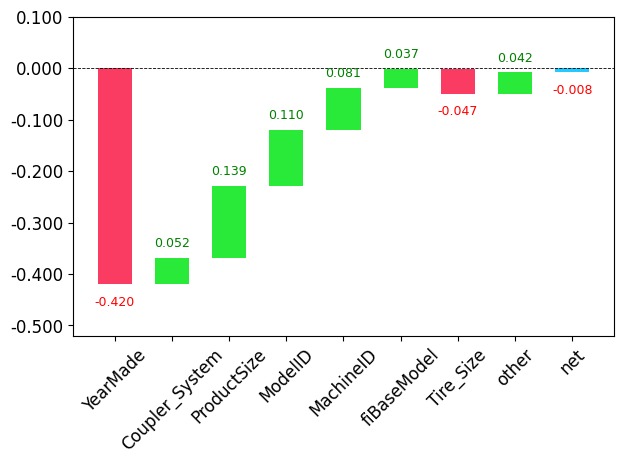

In [ ]:
waterfall(valid_xs_final.columns,contri[0],threshold=0.08,
          rotation_value=45,formatting='{:.3f}')

## Extrapolation and neural nets

### Finding out-of domain data

In [ ]:
sets=pd.concat([xs_final,valid_xs_final])

In [ ]:
is_valid=np.array([0]*len(xs_final)+[1]*len(valid_xs_final))

In [ ]:
m=rf(sets,is_valid)

In [ ]:
feat_import(m,sets)

,cols,imp
17,saleDayofyear,0.579716
8,SalesID,0.185530
10,saleYear,0.171647
9,MachineID,0.045481
18,saleDay,0.009608
14,Hydraulics,0.001596
3,fiProductClassDesc,0.001246
6,Enclosure,0.001193
11,fiBaseModel,0.001161
4,ModelID,0.000807


In [ ]:
m=rf(xs_final,y)
m_rmse(m,valid_xs_final,valid_y)

0.200889

In [ ]:
cols=['saleDayofyear','SalesID','saleYear','MachineID']
for c in cols:
    m=rf(xs_final.drop(c,axis=1),y)
    print(c,":",m_rmse(m,valid_xs_final.drop(c,axis=1),valid_y))

saleDayofyear : 0.197887
SalesID : 0.201994
saleYear : 0.20449
MachineID : 0.198355
